# Air transport movement 1989-2019: 

This data is from the Civil Aviation Authority (https://www.caa.co.uk/Data-and-analysis/UK-aviation-market/Airports/Datasets/UK-airport-data/). It is complete and does not contain and NaN or null values. 

Data before 2011 is exact, data for and after 2011 is rounded to the nearest thousand flights.

As expected, the number of flights per year has generally increased since 1989, with a much sharper increase per year before 2004. There was a drop in flights in 2010 due to an Iclandic volcanic eruption which resulted in 100,000 canceled flights. We will look closely at pollutant levels around 2010 to see whether these cancelled flights had an effect on air quality, keeping in mind possible air contamination from the eruption. 

There is no further cleaning to be done. 

See bottom of notebook for full dataframe (columns: year, number of flights) and plot of flights over time (1989-2019). 

Definition of value from the CAA: "Air transport movements are landings or take-offs of aircraft engaged on the transport of passengers, cargo or mail on commercial terms. All scheduled movements, including those operated empty, loaded charter and air taxi movements
are included."

In [1]:
import pandas as pd

In [2]:
# load in 2009-2019 data 
flights_09 = pd.read_csv('Trans_Move_by_Type_2009_2019.csv')
flights_09.head()

,rundate,span,airport_cluster,rpt_apt_grp_cd1,prt_apt_grp_name,rpt_apt_name,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11,pc_change
0,17/03/2020 12:24,2019 - 2019,1,1,London Area Airports,GATWICK,245377,233553,244570,240447,244301,254540,262571,277094,283437,283186,282896,-0.102406
1,17/03/2020 12:24,2019 - 2019,1,1,London Area Airports,HEATHROW,460178,449271,476295,471382,469564,470708,472058,473199,476186,480339,479811,-0.109922
2,17/03/2020 12:24,2019 - 2019,1,1,London Area Airports,LONDON CITY,66907,59919,61064,64310,68118,70133,79251,80449,76611,78037,80931,3.708497
3,17/03/2020 12:24,2019 - 2019,1,1,London Area Airports,LUTON,75093,68571,72138,71725,70889,75616,87440,102931,106064,106666,112745,5.699098
4,17/03/2020 12:24,2019 - 2019,1,1,London Area Airports,SOUTHEND,75,64,1259,7268,9475,11541,8975,8276,11331,17088,19162,12.137172


In [3]:
# load in 1998-2008 data 
flights_98 = pd.read_csv('Air_Transport_Movements_1998_2008.csv')
flights_98.head()

,rundate,span,airport_cluster,rpt_apt_grp_cd,rpt_apt_grp_name,rpt_apt_name,yr01,yr02,yr03,yr04,yr05,yr06,yr07,yr08,yr09,yr10,yr11,pc_change
0,4/20/2010 13:12,1998 - 2008,1,1,London Area Airports,GATWICK,240235.0,244740.0,251207.0,243981.0,233643.0,234455.0,241174.0,251953.0,254414.0,258921.0,256352.0,-0.992195
1,4/20/2010 13:12,1998 - 2008,1,1,London Area Airports,HEATHROW,441157.0,449453.0,459723.0,457639.0,460292.0,457077.0,469786.0,472041.0,470891.0,475789.0,473207.0,-0.542678
2,4/20/2010 13:12,1998 - 2008,1,1,London Area Airports,LONDON CITY,36854.0,41485.0,49004.0,53763.0,52956.0,48019.0,53199.0,60693.0,66129.0,77274.0,84074.0,8.799855
3,4/20/2010 13:12,1998 - 2008,1,1,London Area Airports,LUTON,43582.0,50849.0,55547.0,55983.0,55009.0,58421.0,64243.0,75424.0,78840.0,83319.0,85661.0,2.810883
4,4/20/2010 13:12,1998 - 2008,1,1,London Area Airports,SOUTHEND,128.0,152.0,172.0,223.0,233.0,78.0,65.0,118.0,562.0,878.0,869.0,-1.025057


In [4]:
# 1989-1997 (no csv file, copied from xls)
flights = [347000, 368000, 362000, 388000, 396000, 412000, 421000, 428000, 431000]

# 1998-2008 
flights_2 = list(flights_98.loc[1, 'yr01':'yr11'])
#flights = [int(i) for i in flights_add]

# 2009-2019
flights_3 = list(flights_09.loc[1, 'Y1':'Y11'])

In [5]:
# concatenate all flights into one list
for i in flights_2: 
    flights.append(i)

for i in flights_3:
    flights.append(i)

In [6]:
# dataframe for flight data: 
years = [str(i) for i in range(1989, 2020)]
list_flights = [[i] for i in flights]

df = pd.DataFrame(list_flights, columns=['number of flights'], index=years)
df

,number of flights
1989,347000.0
1990,368000.0
1991,362000.0
1992,388000.0
1993,396000.0
1994,412000.0
1995,421000.0
1996,428000.0
1997,431000.0
1998,441157.0


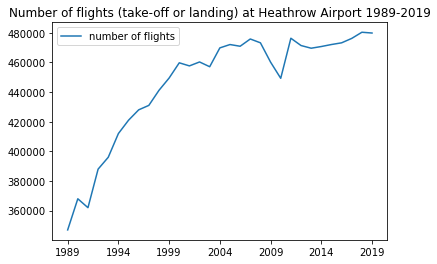

In [7]:
# plot over time
df.plot.line(title='Number of flights (take-off or landing) at Heathrow Airport 1989-2019')